In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('seaborn')

In [129]:
# Create the DataFrame
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy', 'Sunny'],
    'Temperature': ['Hot', 'Hot', 'Mild', 'Cold', 'Cold', 'Cold', 'Mild', 'Hot', 'Mild', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild', 'Hot'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True],
    'Play Golf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)
df

,Outlook,Temperature,Humidity,Windy,Play Golf
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Mild,High,False,Yes
3,Rainy,Cold,High,False,Yes
4,Rainy,Cold,Normal,False,Yes
5,Rainy,Cold,Normal,True,No
6,Overcast,Mild,Normal,True,Yes
7,Sunny,Hot,High,False,No
8,Sunny,Mild,Normal,False,Yes
9,Rainy,Mild,Normal,False,Yes


In [130]:
lblend = LabelEncoder()
df['Outlook'] = lblend.fit_transform(df['Outlook'])
df['Temperature'] = lblend.fit_transform(df['Temperature'])
df['Humidity'] = lblend.fit_transform(df['Humidity'])
df['Windy'] = lblend.fit_transform(df['Windy'])

In [131]:
df

,Outlook,Temperature,Humidity,Windy,Play Golf
0,2,1,0,0,No
1,2,1,0,1,No
2,0,2,0,0,Yes
3,1,0,0,0,Yes
4,1,0,1,0,Yes
5,1,0,1,1,No
6,0,2,1,1,Yes
7,2,1,0,0,No
8,2,2,1,0,Yes
9,1,2,1,0,Yes


In [132]:
## Independent / Dependent vars
X = df.drop(['Play Golf'], axis=1)
y = df[['Play Golf']]

In [133]:
## Feature Selection using SelectKbest and f_classif
# selector = SelectKBest(score_func=f_classif, k = 4) 

In [134]:
## Fit and transform training dataset
# X_train_selected = selector.fit_transform(X, y)

In [135]:
## Create and Train GaussianNB
gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB()

In [136]:
## Make Predictions
y_pred = gnb.predict(X)

In [137]:
## Evaluate Score
print(metrics.accuracy_score(y, y_pred))

0.8


In [138]:
cm = metrics.confusion_matrix(y, y_pred)
cm

array([[3, 2],
       [1, 9]], dtype=int64)

<Axes: >

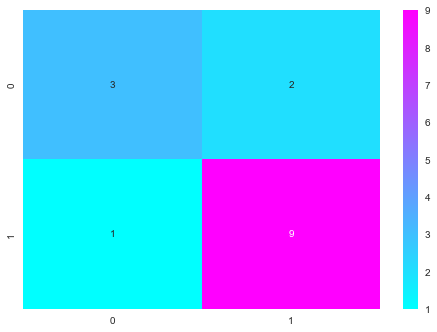

In [139]:
sb.heatmap(cm, annot=True, cmap='cool')

In [140]:
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

          No       0.75      0.60      0.67         5
         Yes       0.82      0.90      0.86        10

    accuracy                           0.80        15
   macro avg       0.78      0.75      0.76        15
weighted avg       0.80      0.80      0.79        15



In [152]:
new_data = {
    'Outlook': [0],
    'Temperature': [0],
    'Humidity': [0],
    'Windy': [0]
}
new_df = pd.DataFrame(new_data)
pc = gnb.predict(new_df)
print(pc[0])

Yes
